In [12]:
import pandas as pd
import numpy as np
import pywedge as pw
from pathlib import Path
from data_dashboard import Dashboard

import matplotlib.pyplot as plt
from fedot.api.main import Fedot
import seaborn as sns

import lightgbm
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ydata_profiling
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from pylab import savefig
import shap

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
path_to_data = Path('/home/kosintsev_ag@sib.evraz.com/PycharmProjects/evraz-ds/M25_3block (1).csv')
data = pd.read_csv(path_to_data)

In [3]:
print('shape:\n', data.shape)
data.info()

shape:
 (909, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   M25      909 non-null    float64
 1   p6       909 non-null    float64
 2   pomol    909 non-null    float64
 3   R0       909 non-null    float64
 4   Sigma_r  909 non-null    float64
 5   Vd       909 non-null    float64
 6   Vt       909 non-null    float64
 7   W        909 non-null    float64
 8   Y        909 non-null    float64
 9   10k_st   909 non-null    float64
 10  9k_st    909 non-null    float64
 11  10m_st   909 non-null    float64
 12  9m_st    909 non-null    float64
 13  KtcE     909 non-null    float64
 14  tek.     909 non-null    float64
 15  Kopt     909 non-null    float64
dtypes: float64(16)
memory usage: 113.8 KB


In [4]:
data.describe()

M25          p6       pomol          R0     Sigma_r          Vd  \
count  909.000000  909.000000  909.000000  909.000000  909.000000  909.000000   
mean    88.868867   11.224731   75.409149    1.089176    0.071542   25.631260   
std      0.388957    1.024926    0.811891    0.033858    0.006011    0.296512   
min     87.100000    8.950000   73.150000    1.003385    0.055000   24.900000   
25%     88.600000   10.400000   74.900000    1.067192    0.066800   25.450000   
50%     88.900000   11.200000   75.500000    1.084364    0.070700   25.633333   
75%     89.100000   11.850000   76.000000    1.111583    0.075800   25.825000   
max     90.200000   14.100000   77.400000    1.176072    0.090500   26.400000   

               Vt           W           Y       10k_st        9k_st  \
count  909.000000  909.000000  909.000000   909.000000   909.000000   
mean    71.848818    9.672285   17.999570  1292.288634  1293.676516   
std      2.897522    0.415654    0.079890     9.154712     8.998797   
min     64.317222    8.550000   17.366279  1267.000000  1269.000000   
25%     69.922000    9.350000   17.988375  1287.000000  1288.000000   
50%     71.692083    9.650000   18.000000  1292.000000  1294.000000   
75%     73.668750    9.950000   18.002098  1299.000000  1299.000000   
max     79.314091   10.800000   18.500000  1318.000000  1317.000000   

            10m_st        9m_st        KtcE          tek.        Kopt  
count   909.000000   909.000000  909.000000    909.000000  909.000000  
mean   1252.777915  1253.664735    0.895989  13519.694167    0.808916  
std       8.846712     8.769949    0.013592   1720.166520    0.076868  
min    1229.000000  1230.000000    0.859873   9203.269231    0.602152  
25%    1247.000000  1248.000000    0.886900  12789.500000    0.761673  
50%    1253.000000  1254.000000    0.895500  13642.709190    0.818343  
75%    1259.000000  1259.000000    0.905000  14511.250000    0.861410  
max    1277.000000  1278.000000    0.931368  17800.550000    0.953494

In [ ]:
mc = pw.Pywedge_Charts(data, c=None, y='M25')
charts = mc.make_charts()

/home/kosintsev_ag@sib.evraz.com/PycharmProjects/2023_evraz_hackaton/venv/lib/python3.7/site-packages/pywedge/pywedge.py:27: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



HTML(value='<h2>Pywedge Make_Charts </h2>')

/home/kosintsev_ag@sib.evraz.com/PycharmProjects/2023_evraz_hackaton/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2593: UserWarning:

n_quantiles (1000) is greater than the total number of samples (681). n_quantiles is set to n_samples.

/home/kosintsev_ag@sib.evraz.com/PycharmProjects/2023_evraz_hackaton/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2593: UserWarning:

n_quantiles (1000) is greater than the total number of samples (909). n_quantiles is set to n_samples.

/home/kosintsev_ag@sib.evraz.com/PycharmProjects/2023_evraz_hackaton/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2593: UserWarning:

n_quantiles (1000) is greater than the total number of samples (909). n_quantiles is set to n_samples.



Found model: RandomForestRegressor
Creating Dashboard...


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Lato


Created output at your_path/dashboard_output


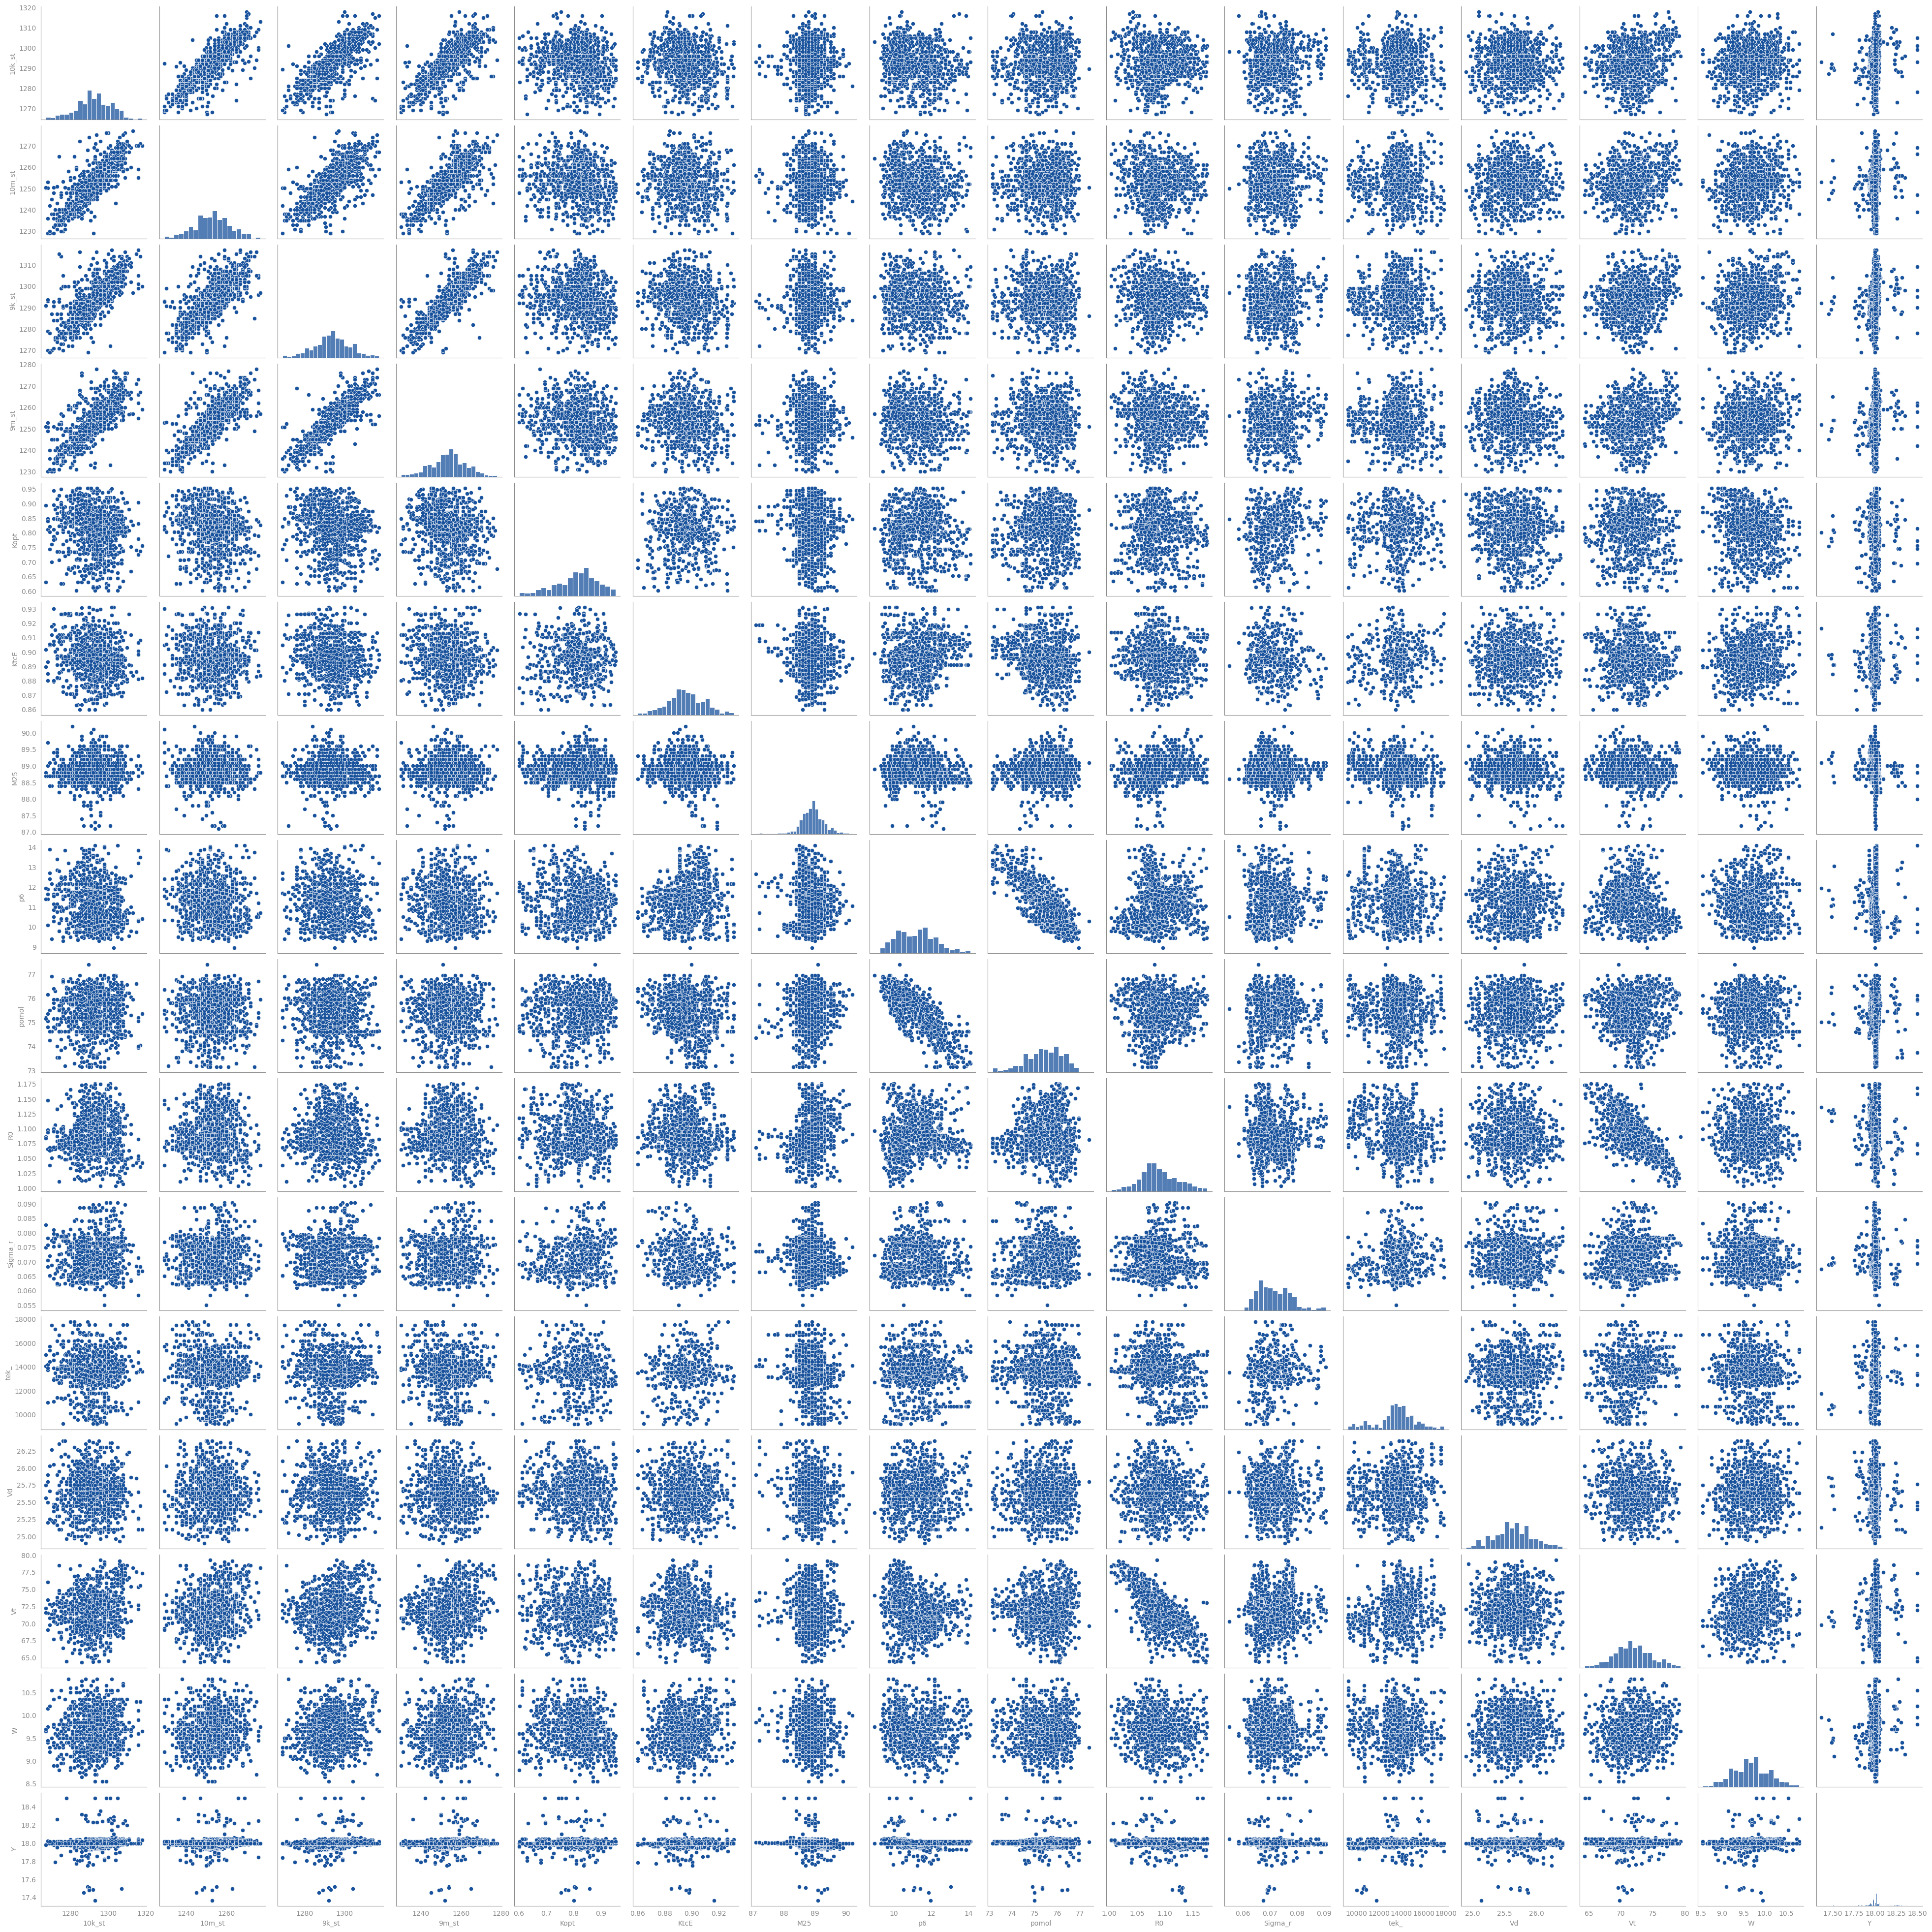

In [12]:
output_directory = 'your_path/dashboard_output'
X, y, descriptions = data.drop('M25', axis=1), data['M25'], None
# descriptions is an optional argument, more in documentation
dsh = Dashboard(X, y, output_directory, descriptions)
dsh.create_dashboard()

In [18]:
def plot_scatters(df, plot_cols):
    for col in plot_cols:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_title(col)
        ax.scatter(df.index, df[col], c=[[0.5, 0, 0.5, 0.15]])

def plot_hists(df, plot_cols):
    for col in plot_cols:
        f, ax = plt.subplots(figsize=(10,6))
        ax.set_title(col)
        df[col].hist(bins=100)

def isna_percent(df):
    return (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

In [19]:
isna_percent(data)

M25        0.0
p6         0.0
pomol      0.0
R0         0.0
Sigma_r    0.0
Vd         0.0
Vt         0.0
W          0.0
Y          0.0
10k_st     0.0
9k_st      0.0
10m_st     0.0
9m_st      0.0
KtcE       0.0
tek.       0.0
Kopt       0.0
dtype: float64

# Обучение моделей

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('M25', axis=1), data['M25'], test_size=0.2, shuffle=False)

model = Fedot(problem='regression', timeout=15, preset='best_quality', n_jobs=-1)
model.fit(features=x_train, target=y_train)
prediction = model.predict(features=x_test)
metrics = model.get_metrics(target=y_test)

2023-02-16 10:52:52,944 - ApiComposer - Initial pipeline was fitted in 0.3 sec.
2023-02-16 10:52:52,947 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 15 min. Set of candidate models: ['linear', 'ransac_lin_reg', 'pca', 'ridge', 'svr', 'scaling', 'ransac_non_lin_reg', 'gbr', 'adareg', 'fast_ica', 'knnreg', 'lgbmreg', 'isolation_forest_reg', 'dtreg', 'lasso', 'sgdr', 'normalization', 'rfr', 'poly_features', 'treg'].
2023-02-16 10:52:52,949 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-02-16 10:56:16,008 - GroupedCondition - Optimisation finished: Early stopping iterations criteria was satisfied


Generations:   0%|          | 1/10000 [03:23<?, ?gen/s]

2023-02-16 10:56:16,012 - ApiComposer - Hyperparameters tuning started with 12 min. timeout


2023-02-16 10:56:18,117 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 3, 'nodes': [rfr, isolation_forest_reg, pca]}
rfr - {'n_jobs': 1}
isolation_forest_reg - {}
pca - {'svd_solver': 'full', 'n_components': 0.7} 
Initial metric: 0.310
  0%|          | 470/100000 [11:36<41:50:57,  1.51s/trial, best loss: 0.30907117571053366]
2023-02-16 11:08:10,545 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 3, 'nodes': [rfr, isolation_forest_reg, pca]}
rfr - {'n_jobs': 1, 'bootstrap': True, 'max_features': 0.757445699591286, 'min_samples_leaf': 1, 'min_samples_split': 2}
isolation_forest_reg - {'bootstrap': False, 'max_features': 0.30254585602288575, 'max_samples': 0.6102130843682003}
pca - {'svd_solver': 'full', 'n_components': 0.14514861556417177}
2023-02-16 11:08:10,546 - PipelineTuner - Final metric: 0.309
2023-02-16 11:08:10,548 - ApiComposer - Hyperparameters tuning finished
2023-02-16 11:08:10,729 - ApiComposer - Model generation finished
2023-02-16 11:08:11,154 - FEDOT

In [6]:
metrics

{'rmse': 0.612, 'mae': 0.488}

In [13]:
r2_score(y_test, prediction)

-3.8163532915362746

In [ ]:
cols_for_model = []

gbm = lightgbm.LGBMRegressor()
model_list = [gbm, ]


def train_model(model_list, x, y):
    for model in model_list:

        df_r2 = pd.Series()

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)

        fig, ax = plt.subplots(figsize=(12,8))
        ax.set_title(f"Модель {model}")
        feature_importances = pd.Series(model.feature_importances_, index=x.columns)
        top_vals = feature_importances.nlargest(10).sort_values(ascending=True)
        y_label = [str(i) for i in top_vals.index.values]
        # print(y_label)
        ax.barh(y_label, top_vals.values)
        plt.show()

        mse, mae = np.round(mean_absolute_error(y_test, y_pred),10), np.round(mean_squared_error(y_test, y_pred), 10)
        mse = np.round(mse, 8)
        mae = np.round(mae, 8)

        print("MSE =", mse)
        print("MAE =", mae)
        plt.style.use("ggplot")
        fig, ax = plt.subplots(figsize=(15,15))

        test_r2 = np.round(r2_score(y_test, y_pred)*100, 2)
        labell = f"R2 = {test_r2}%, MAE={mae}"
        ax.set_title(labell)
        ax.set_xlabel("FACT")
        ax.set_ylabel("PREDICTION")
        ax.scatter(y_test, y_pred, c=[[0.5, 0, 0.5, 0.15]],)

        line_45_x = [i for i in [y_test.min(), y_test.max()]]
        line_45_y = [i for i in [y_test.min(), y_test.max()]]
        ax.plot(line_45_x, line_45_y, color="gray")
        df_r2[str(model)] = test_r2
        plt.show()
        print("R2 =", test_r2)